<a href="https://colab.research.google.com/github/Royshim/datascience-ass2/blob/main/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np



loading dataset


In [30]:
# Read the Excel dataset
df = pd.read_excel('/content/Road Accident Data.xlsx')

# Select first 10 rows
df = df.head(10)

# Select relevant features for accident severity prediction
relevant_features = [
    'Junction_Control',
    'Weather_Conditions',
    'Road_Surface_Conditions',
    'Light_Conditions',
    'Road_Type',
    'Speed_limit',
    'Number_of_Vehicles',
    'Number_of_Casualties',
    'Vehicle_Type'
]

# Create a copy of relevant features
df_model = df[relevant_features + ['Accident_Severity']]

print("Dataset Shape:", df_model.shape)
print("\nSelected features and their data:")
display(df_model)

Dataset Shape: (10, 10)

Selected features and their data:


,Junction_Control,Weather_Conditions,Road_Surface_Conditions,Light_Conditions,Road_Type,Speed_limit,Number_of_Vehicles,Number_of_Casualties,Vehicle_Type,Accident_Severity
0,Give way or uncontrolled,Fine no high winds,Dry,Daylight,One way street,30,2,1,Car,Serious
1,Give way or uncontrolled,Fine no high winds,Wet or damp,Daylight,Single carriageway,30,2,11,Taxi/Private hire car,Serious
2,Give way or uncontrolled,Fine no high winds,Dry,Daylight,Single carriageway,30,2,1,Taxi/Private hire car,Slight
3,Auto traffic signal,Other,Frost or ice,Daylight,Single carriageway,30,2,1,Motorcycle over 500cc,Serious
4,Auto traffic signal,Fine no high winds,Dry,Darkness - lights lit,Single carriageway,30,2,1,Car,Serious
5,Give way or uncontrolled,Fine no high winds,Dry,Daylight,Single carriageway,30,2,3,Car,Slight
6,Give way or uncontrolled,Fine no high winds,Dry,Daylight,Single carriageway,30,2,1,Motorcycle over 500cc,Serious
7,Auto traffic signal,Fine no high winds,Dry,Daylight,Dual carriageway,30,1,1,Car,Slight
8,Give way or uncontrolled,Fine no high winds,Dry,Daylight,Single carriageway,30,1,2,Van / Goods 3.5 tonnes mgw or under,Slight
9,Auto traffic signal,Other,Wet or damp,Daylight,Single carriageway,30,1,1,Car,Slight


data preprocessing

In [8]:
# Initialize LabelEncoder
le = LabelEncoder()

# Create copy of dataframe for encoding
df_processed = df_model.copy()

# Encode categorical variables
categorical_columns = [
    'Junction_Control',
    'Weather_Conditions',
    'Road_Surface_Conditions',
    'Light_Conditions',
    'Road_Type',
    'Vehicle_Type',
    'Accident_Severity'
]

# Encode each categorical column
for col in categorical_columns:
    df_processed[f'{col}_Encoded'] = le.fit_transform(df_processed[col])

# Drop original categorical columns
df_processed = df_processed.drop(categorical_columns, axis=1)

print("Processed data with encoded values:")
display(df_processed)

Processed data with encoded values:


,Speed_limit,Number_of_Vehicles,Number_of_Casualties,Junction_Control_Encoded,Weather_Conditions_Encoded,Road_Surface_Conditions_Encoded,Light_Conditions_Encoded,Road_Type_Encoded,Vehicle_Type_Encoded,Accident_Severity_Encoded
0,30,2,1,1,0,0,1,1,0,0
1,30,2,11,1,0,2,1,2,2,0
2,30,2,1,1,0,0,1,2,2,1
3,30,2,1,0,1,1,1,2,1,0
4,30,2,1,0,0,0,0,2,0,0
5,30,2,3,1,0,0,1,2,0,1
6,30,2,1,1,0,0,1,2,1,0
7,30,1,1,0,0,0,1,0,0,1
8,30,1,2,1,0,0,1,2,3,1
9,30,1,1,0,1,2,1,2,0,1


feature and target preparations

In [9]:
# Prepare features (X) and target (y)
X = df_processed.drop('Accident_Severity_Encoded', axis=1)
y = df_processed['Accident_Severity_Encoded']

print("Features:")
display(X)
print("\nTarget (Accident Severity):")
display(y)

Features:


,Speed_limit,Number_of_Vehicles,Number_of_Casualties,Junction_Control_Encoded,Weather_Conditions_Encoded,Road_Surface_Conditions_Encoded,Light_Conditions_Encoded,Road_Type_Encoded,Vehicle_Type_Encoded
0,30,2,1,1,0,0,1,1,0
1,30,2,11,1,0,2,1,2,2
2,30,2,1,1,0,0,1,2,2
3,30,2,1,0,1,1,1,2,1
4,30,2,1,0,0,0,0,2,0
5,30,2,3,1,0,0,1,2,0
6,30,2,1,1,0,0,1,2,1
7,30,1,1,0,0,0,1,0,0
8,30,1,2,1,0,0,1,2,3
9,30,1,1,0,1,2,1,2,0



Target (Accident Severity):


,Accident_Severity_Encoded
0,0
1,0
2,1
3,0
4,0
5,1
6,0
7,1
8,1
9,1


creation and model training

In [24]:
# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Display model coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("Model Coefficients:")
display(coef_df)
print("\nIntercept:", model.intercept_)

Model Coefficients:


,Feature,Coefficient
0,Speed_limit,0.000000
1,Number_of_Vehicles,-0.785865
2,Number_of_Casualties,-0.022152
3,Junction_Control_Encoded,-1.017932
4,Weather_Conditions_Encoded,-1.470464
5,Road_Surface_Conditions_Encoded,-0.108650
6,Light_Conditions_Encoded,1.821730
7,Road_Type_Encoded,0.803797
8,Vehicle_Type_Encoded,-0.162447



Intercept: -0.013713080168771485


visualization

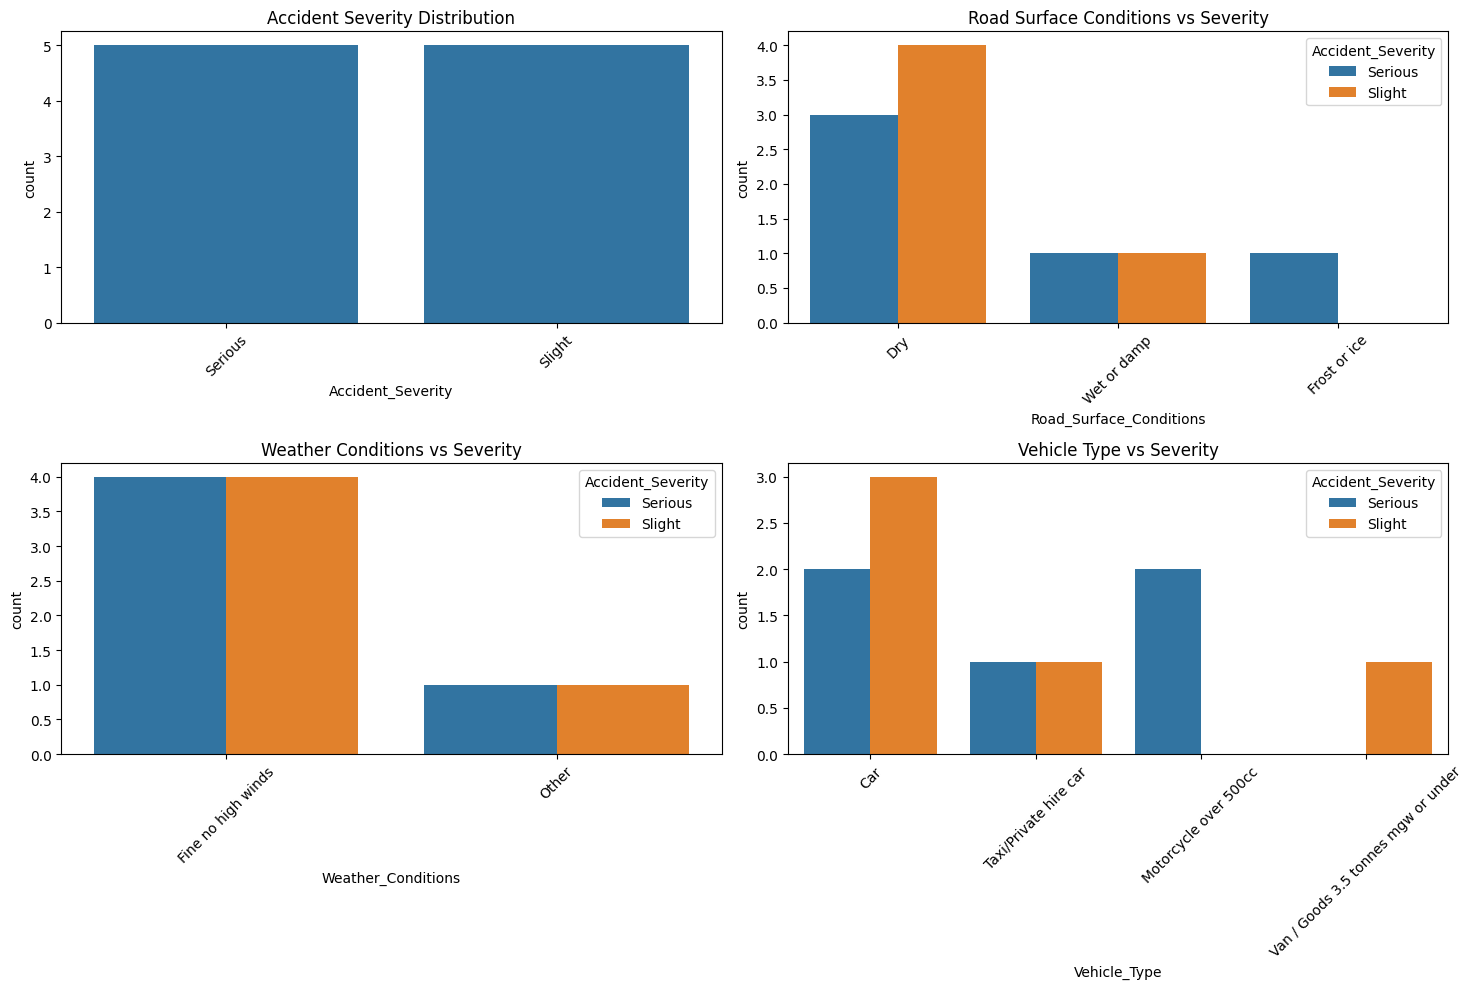

In [11]:
plt.figure(figsize=(15, 10))

# 1. Accident Severity Distribution
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Accident_Severity')
plt.title('Accident Severity Distribution')
plt.xticks(rotation=45)

# 2. Road Surface Conditions vs Accident Severity
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Road_Surface_Conditions', hue='Accident_Severity')
plt.title('Road Surface Conditions vs Severity')
plt.xticks(rotation=45)

# 3. Weather Conditions vs Accident Severity
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Weather_Conditions', hue='Accident_Severity')
plt.title('Weather Conditions vs Severity')
plt.xticks(rotation=45)

# 4. Vehicle Type vs Accident Severity
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Vehicle_Type', hue='Accident_Severity')
plt.title('Vehicle Type vs Severity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [23]:
#Use the model to make predictions for the first 10 rows
sample_input_encoded = df_processed.drop(columns='Accident_Severity_Encoded')

# Make predictions
predictions = model.predict(sample_input_encoded)

# Step 7: Clip, round, and map predictions to severity labels
# Clip the predictions to be between 0 (Slight), 1 (Serious), and 2 (Fatal)
prediction_clipped = np.clip(np.round(predictions), 0, 2).astype(int)

# Map numeric predictions to accident severity labels
severity_labels = ['Slight', 'Serious', 'Fatal']
predicted_severity = [severity_labels[prediction] for prediction in prediction_clipped]

# Step 8: Add the predicted severity to the sample data
df['Predicted_Accident_Severity'] = predicted_severity

# Display the results
print(df[['Accident_Index', 'Predicted_Accident_Severity']].head(10))


  Accident_Index Predicted_Accident_Severity
0  200901BS70001                      Slight
1  200901BS70002                      Slight
2  200901BS70003                      Slight
3  200901BS70004                      Slight
4  200901BS70005                      Slight
5  200901BS70006                     Serious
6  200901BS70007                     Serious
7  200901BS70008                     Serious
8  200901BS70009                     Serious
9  200901BS70010                     Serious


prediction

save *model


In [32]:
import pickle

# Save model
with open('accident_severity_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save encoder
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)

print("Model and encoder saved successfully!")

Model and encoder saved successfully!
